# Multiclass Classification

The dataset contains the following columns:
* **CulmenLength**: The length in mm of the penguin's culmen (bill).
* **CulmenDepth**: The depth in mm of the penguin's culmen.
* **FlipperLength**: The length in mm of the penguin's flipper.
* **BodyMass**: The body mass of the penguin in grams.
* **Species**: An integer value that represents the species of the penguin.

In [3]:
import pandas as pd

# Memuat dataset 
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv'
penguin = pd.read_csv(url)

# Menampilkan random samping dari 10 observasi
sample = penguin.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
190,44.0,13.6,208.0,4350.0,1
158,45.4,14.6,211.0,4800.0,1
330,42.5,17.3,187.0,3350.0,2
143,40.7,17.0,190.0,3725.0,0
108,38.1,17.0,181.0,3175.0,0
267,55.1,16.0,230.0,5850.0,1
85,41.3,20.3,194.0,3550.0,0
326,48.1,16.4,199.0,3325.0,2
219,49.5,16.2,229.0,5800.0,1
78,36.2,16.1,187.0,3550.0,0


In [8]:
# Menghitung nilai null kepada setiap kolom
penguin.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [4]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[:5].values, 'SpeciesName')
for index, row in penguin.sample(10).iterrows(): 
    print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.8 17.3 198.0 3675.0 2 ] Chinstrap
[ 50.8 15.7 226.0 5200.0 1 ] Gentoo
[ 54.2 20.8 201.0 4300.0 2 ] Chinstrap
[ 39.7 17.7 193.0 3200.0 0 ] Adelie
[ 45.2 15.8 215.0 5300.0 1 ] Gentoo
[ 42.0 20.2 190.0 4250.0 0 ] Adelie
[ 43.2 18.5 192.0 4100.0 0 ] Adelie
[ 40.3 18.0 195.0 3250.0 0 ] Adelie
[ 48.4 16.3 220.0 5400.0 1 ] Gentoo
[ 44.1 19.7 196.0 4400.0 0 ] Adelie


In [13]:
# Menampilkan baris yang berisi Null(NaN)
penguin[penguin.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [15]:
# Menghapus baris yang berisi Null(NaN)
penguin=penguin.dropna()

# Menkonfirmasi ulang setelah di hapus
penguin.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

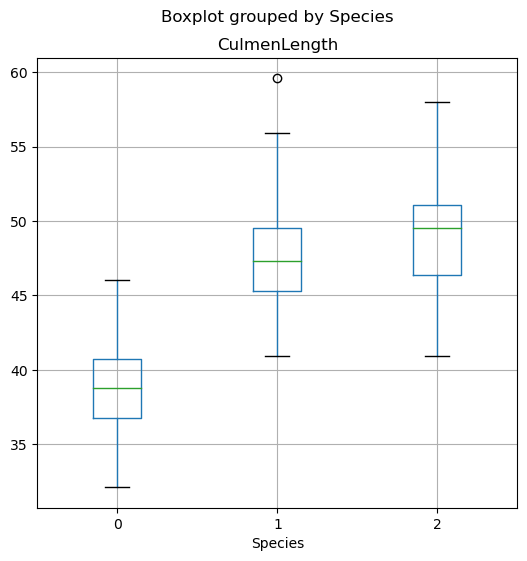

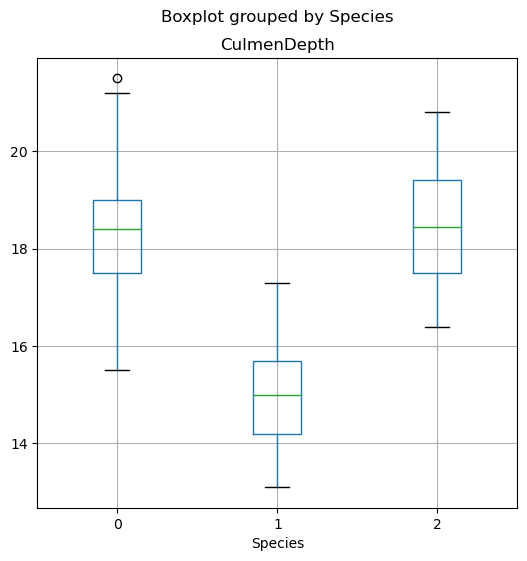

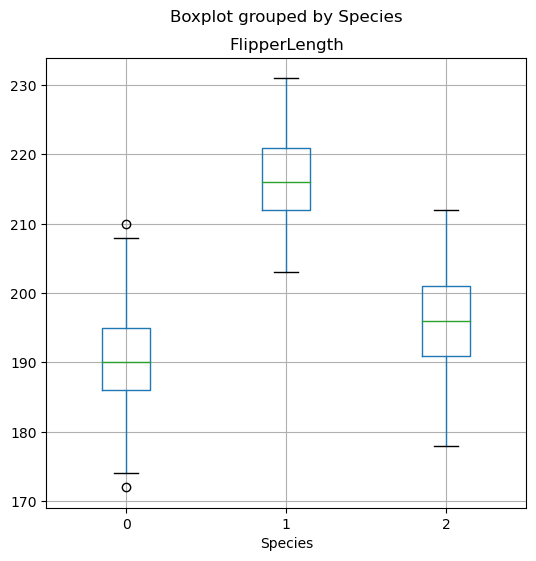

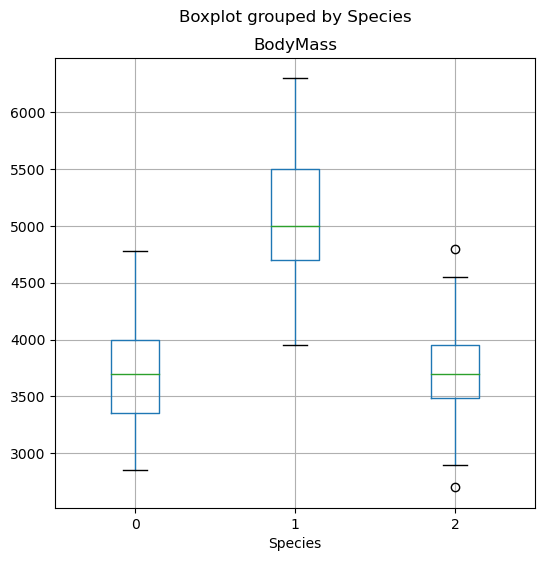

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguin.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

### Data Preprocessing

In [23]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
penguin_X, penguin_y = penguin[penguin_features].values, penguin[penguin_label].values

# Memisahkan data 70%-30% ke dalam set pelatihan
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguin_X, penguin_y,
                                                                                   test_size=0.30,
                                                                                   random_state=0,
                                                                                   stratify=penguin_y)
print ('Training Set: %d, \nTest Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, 
Test Set: 103 



In [24]:
from sklearn.linear_model import LogisticRegression

# Menetapkan tingkat regularisasi
reg = 0.1

# Melatih model regresi logistik pada training set
multi_model = LogisticRegression(C=4/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print(multi_model)

LogisticRegression(C=40.0, max_iter=10000)


In [25]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels: ', y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels:  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Overall Accuracy:', accuracy_score(y_penguin_test, penguin_predictions))
print('Overall Precision:', precision_score(y_penguin_test, penguin_predictions, average='macro'))
print('Overall Recall:', recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [28]:
from sklearn.metrics import confusion_matrix

# Menampilkan nilai konfusion(kebingungan)
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


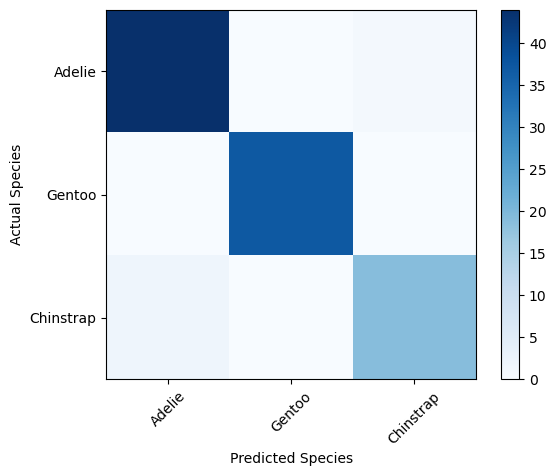

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

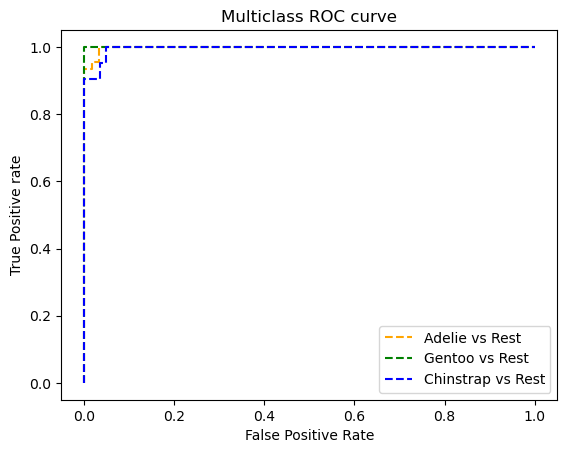

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Mendapatkan skor probabilitas
penguin_proba = multi_model.predict_proba(x_penguin_test)

# Mendapatkan metrik ROC untuk setiap kelas
fpr = {}
tpr = {}
thresh = {}
for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_proba[:,i], pos_label=i)

# Meambuat plot grafik
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [30]:
auc = roc_auc_score(y_penguin_test,penguin_proba, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9980064168457776


### Data Preprocessing in a Pipeline

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#
feature_columns = [0, 1, 2, 3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

#
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SVC(probability=True))])

#
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


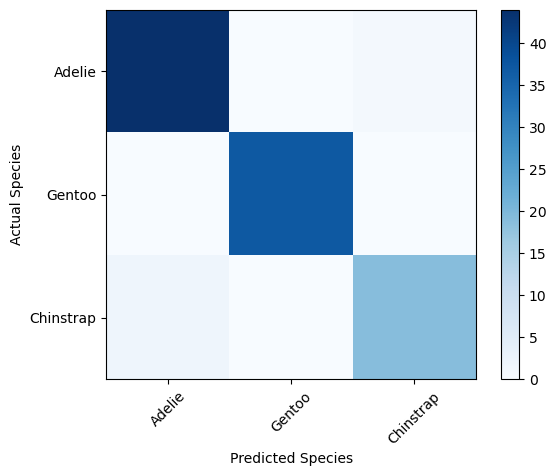

In [42]:
# Mendapatkan prediksi dari data uji
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Menampilkan Metrik keseluruhan 
print('Overall Accuracy:', accuracy_score(y_penguin_test, penguin_predictions))
print('Overall Precision:', precision_score(y_penguin_test, penguin_predictions, average='macro'))
print('Overall Recall:', recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test, penguin_prob, multi_class='ovr'))

# Menampilkan Matriks Kebingunan 
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

### Use the model with new data Observation

In [43]:
import joblib

# Menyimpan model sebagai file acak
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [45]:
# Memuat model dari file
multi_model = joblib.load(filename)

# Menerima model baru untuk diprediksi
x_new = np.array([[50.4, 15.3,224,5550]])

# Model mengambil array prediksi
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

Predicted class is Gentoo


In [46]:
# Memasukan Array 2D
x_new = np.array([[49.5,18.4,195,3600],
                 [38.2,20.1,190,3900]])

# Memprediksi melalui data input
predictions = multi_model.predict(x_new)

# Mendapatkan kelas yang diprediksi
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] + ')')

2 (Chinstrap)
0 (Adelie)


## Summary

Teknik algoritma klasifikasi sebuah metode pembelajaran yang paling fleksibel, dengan mengikuti prinsip-prinsip dasarnya.Nah, algoritma ini juga perlu melatih dan mengevaluasi model.